# Results
This notebook is to check the results. First we will load the best model that was found during hyperparameter tuning (in this case the RandomForestRegressor) and visualise the predictions on the test data set.

In [46]:
import pandas as pd
import os
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error


import shap


from utils.tabular_data import load_airbnb_data

We found out that best model was Gradient Boosting Regressor model. We will load the model from the saved model and look at the results.

In [25]:
gb_model = joblib.load("models/regression/GradientBoostingRegressor/GradientBoostingRegressor.joblib")

In [36]:

df = pd.read_csv("data/cleaned_data.csv")
df.drop(columns=["Unnamed: 19"], inplace=True)
X, y = load_airbnb_data(df, "Price_Night")
X = X.select_dtypes(include=np.number)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, min_samples_leaf=8, min_samples_split=10)

In [39]:
y_hat = gb_model.predict(X_train)
y_test_hat = gb_model.predict(X_test)

In [49]:
print(f"mean_absolute_error: {mean_absolute_error(y_test_hat, y_test)}")
print(f"mean_squared_error: {mean_squared_error(y_test_hat, y_test)}")
print(f"root_mean_squared_error: {root_mean_squared_error(y_test_hat, y_test)}")
print(f"r2_score: {r2_score(y_test_hat, y_test)}")



mean_absolute_error: 37.52507797824936
mean_squared_error: 2376.7742701524608
root_mean_squared_error: 48.75217195318031
r2_score: -1.8189761527487125


[Text(0, 0.5, 'predicted no of bedrooms')]

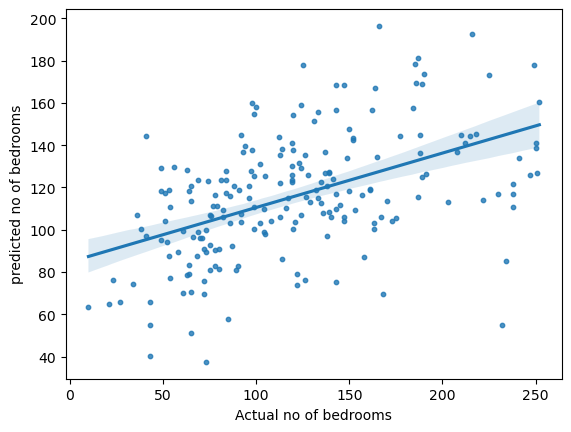

In [40]:
ax = sns.regplot(x=y_test,y=y_test_hat,scatter_kws={'s':10})
ax.set(xlabel="Actual no of bedrooms")
ax.set(ylabel="predicted no of bedrooms")

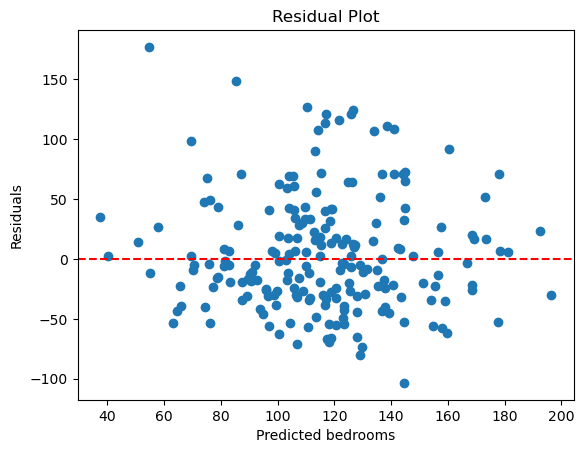

In [41]:
residuals = y_test - y_test_hat
plt.scatter(y_test_hat, residuals)
plt.xlabel('Predicted bedrooms')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [42]:
X_train_summary = shap.kmeans(X_train, 10)


c:\Users\abhik\miniconda3\envs\aicore\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [43]:
ex = shap.KernelExplainer(gb_model.predict, X_train_summary)

  0%|          | 0/204 [00:00<?, ?it/s]

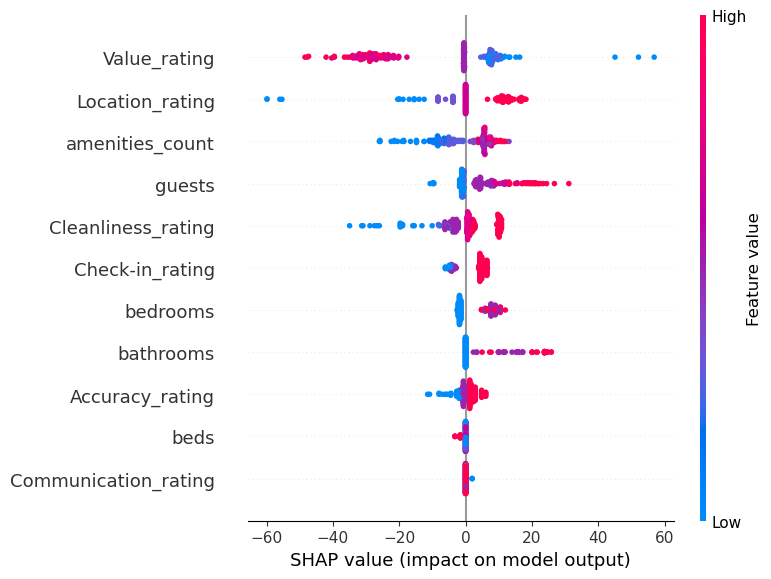

In [44]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)